In [1]:
%load_ext autoreload
%autoreload 2                                                                                                                           

In [2]:
import os
import sys
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt



In [3]:
sys.path.insert(0, '../')

In [4]:
from lv.fisher.fisher import Fisher

In [5]:
f=Fisher()
f.init()

https://archive.stsci.edu/missions/hlsp/bosz/ascii/insbroad_050000/metal_-2.00/carbon_+0.00/alpha_+0.25/amm20cp00op03t8000g25v20modrt0b50000rs.asc.bz2
#8893 R=20000.03


In [6]:
pmt = [-2.0,8000,2.5,0.0,0.25]
f.testTemplate(pmt)

https://archive.stsci.edu/missions/hlsp/bosz/ascii/insbroad_050000/metal_-2.00/carbon_+0.00/alpha_+0.25/amm20cp00op03t8000g25v20modrt0b50000rs.asc.bz2
https://archive.stsci.edu/missions/hlsp/bosz/ascii/insbroad_050000/metal_-2.00/carbon_+0.00/alpha_+0.25/amm20cp00op03t8000g20v20modrt0b50000rs.asc.bz2
https://archive.stsci.edu/missions/hlsp/bosz/ascii/insbroad_050000/metal_-2.00/carbon_+0.00/alpha_+0.25/amm20cp00op03t8000g30v20modrt0b50000rs.asc.bz2
https://archive.stsci.edu/missions/hlsp/bosz/ascii/insbroad_050000/metal_-2.00/carbon_+0.00/alpha_+0.25/amm20cp00op03t7750g25v20modrt0b50000rs.asc.bz2
https://archive.stsci.edu/missions/hlsp/bosz/ascii/insbroad_050000/metal_-2.00/carbon_+0.00/alpha_+0.25/amm20cp00op03t7750g20v20modrt0b50000rs.asc.bz2
https://archive.stsci.edu/missions/hlsp/bosz/ascii/insbroad_050000/metal_-2.00/carbon_+0.00/alpha_+0.25/amm20cp00op03t7750g30v20modrt0b50000rs.asc.bz2
https://archive.stsci.edu/missions/hlsp/bosz/ascii/insbroad_050000/metal_-2.00/carbon_+0.00/al

In [8]:
temp=f.temps[0]

In [10]:
np.random.seed(42)
rvarr = 200*(np.random.rand(5)-0.5)
nlarr = f.Util.makeNLArray(temp.sst,temp.skym)

In [11]:
nlarr

array([188.75328256,  93.87556291,  65.13817454,  41.46674699,
        18.45589763])

In [12]:
f.flux

array([4935734.32229498, 6659922.27256685, 7369476.42352156, ...,
       2469939.39238261, 2232008.63341868, 1654097.48223738])

In [13]:
f.pmts

[[-2.0, 8000, 2.5, 0.0, 0.25],
 [-2.0, 8000, 2.0, 0.0, 0.25],
 [-2.0, 8000, 3.0, 0.0, 0.25],
 [-2.0, 7750.0, 2.5, 0.0, 0.25],
 [-2.0, 7750.0, 2.0, 0.0, 0.25],
 [-2.0, 7750.0, 3.0, 0.0, 0.25],
 [-2.0, 8250.0, 2.5, 0.0, 0.25],
 [-2.0, 8250.0, 2.0, 0.0, 0.25],
 [-2.0, 8250.0, 3.0, 0.0, 0.25]]

In [391]:
t1 = f.makeTemplate(-2.0, 8000,2.0,0.0,0.25)

https://archive.stsci.edu/missions/hlsp/bosz/ascii/insbroad_050000/metal_-2.00/carbon_+0.00/alpha_+0.25/amm20cp00op03t8000g20v20modrt0b50000rs.asc.bz2
#8893 R=20000.03


Fitting with Template T8000G25Mm20Ap03Cp00
RV err=0.62%
sigma_z=0.07661
[[ 5.72274178e-07 -4.36730043e-08]
 [-4.36730043e-08  5.86943505e-03]]


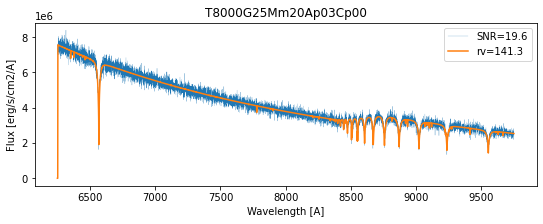

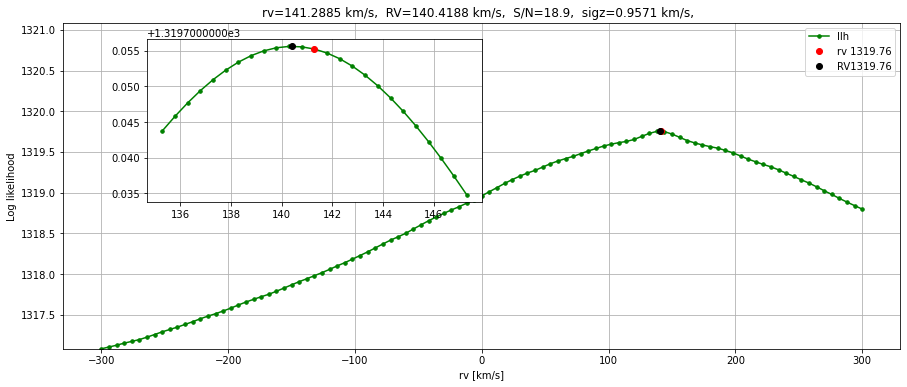

In [28]:
rv  = 141.28845313 
NL  = 100
# t0 = f.temps[-1]
t0=temp
RV,F = f.testOneRV1(f.flux, t0,rv,NL, pmt0=f.pmt);
ff = sp.linalg.inv(np.array(F))
print(ff)

Fitting with Template T8000G25Mm20Ap03Cp00
RV err=0.63%
sigma_z=0.07052


array([[ 5.83014839e-07, -4.09766618e-08],
       [-4.09766618e-08,  4.97243070e-03]])

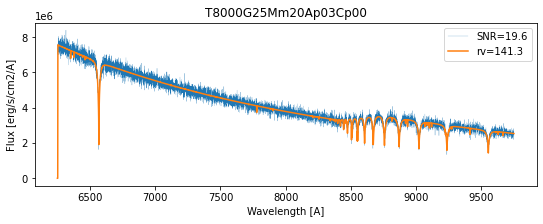

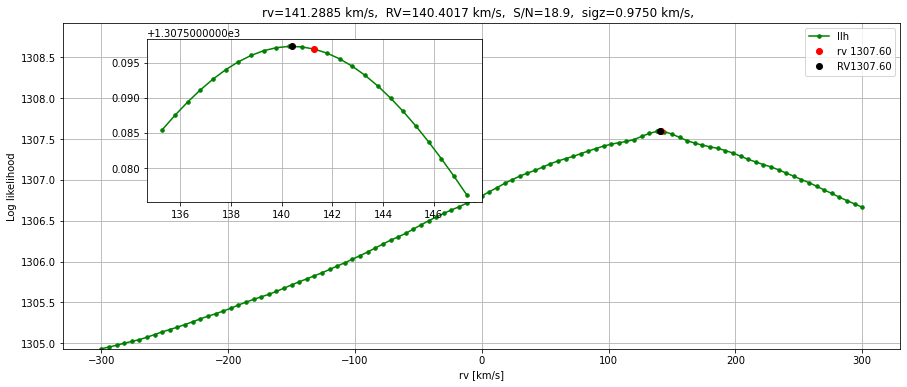

In [32]:
sky_mask0 = f.getSkyMask(0.98)
RV_mask,F_mask = f.testOneRV1(f.flux, t0,rv,NL, pmt0=f.pmt, sky_mask0=sky_mask0);
ff_mask = sp.linalg.inv(np.array(F_mask))
ff_mask

Fitting with Template T8250G30Mm20Ap03Cp00
RV err=1.02%
sigma_z=0.27051


array([[ 1.96946899e-06, -5.26428138e-07],
       [-5.26428138e-07,  7.31782423e-02]])

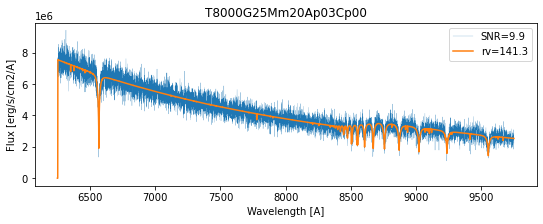

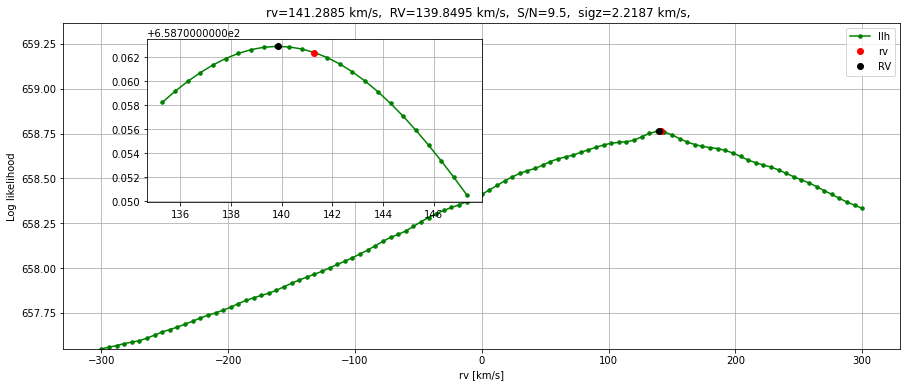

In [528]:
RV,F = f.testOneRV1(f.flux, t1, rv,NL, pmt0=f.pmt);
ff = sp.linalg.inv(np.array(F))
ff

Fitting with Template T8250G30Mm20Ap03Cp00
RV err=27.00%
sigma_z=0.38452


array([[ 3.43646889e-06, -1.31381172e-06],
       [-1.31381172e-06,  1.47854222e-01]])

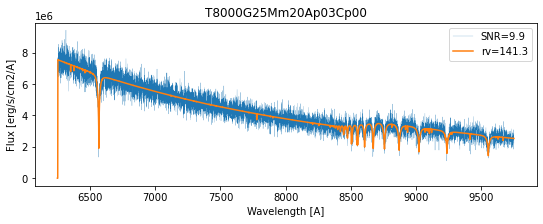

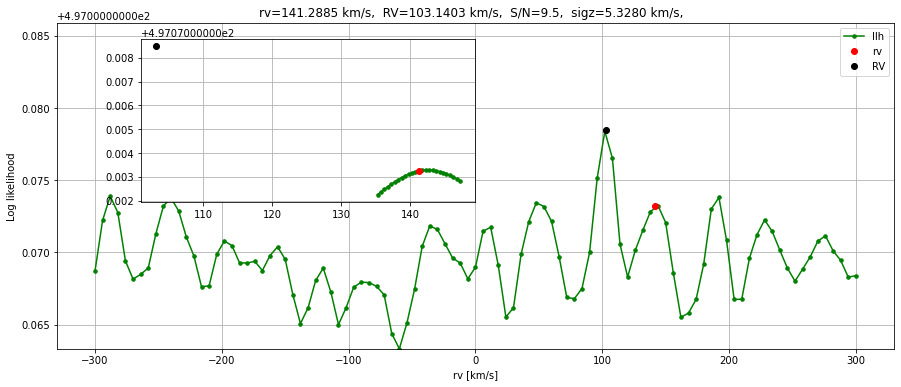

In [529]:
sky_mask0 = f.getSkyMask(0.5)
RV_mask,F_mask = f.testOneRV1(f.flux, t1,rv,NL, pmt0=f.pmt, sky_mask0=sky_mask0);
ff_mask = sp.linalg.inv(np.array(F_mask))
ff_mask

Fitting with Template T7750G20Mm20Ap03Cp00
RV err=26.89%
sigma_z=0.46788


array([[ 4.78824618e-06, -2.21727563e-06],
       [-2.21727563e-06,  2.18914419e-01]])

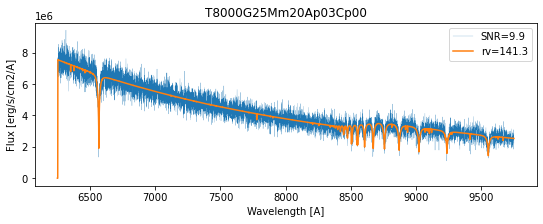

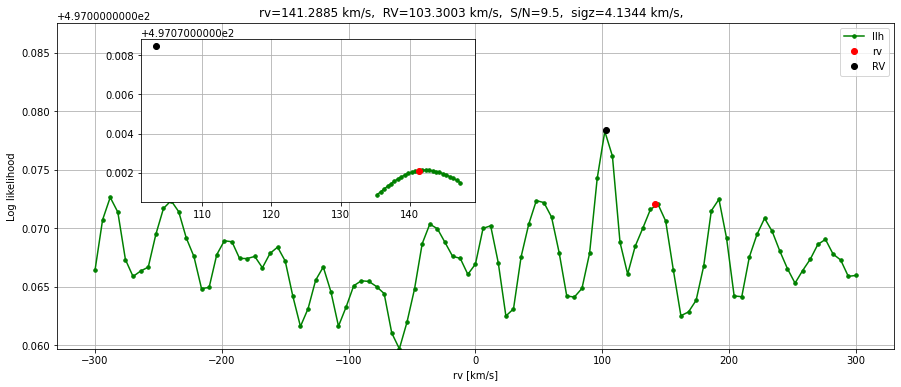

Fitting with Template T8000G25Mm20Ap03Cp00
RV err=0.19%
sigma_z=1.03695


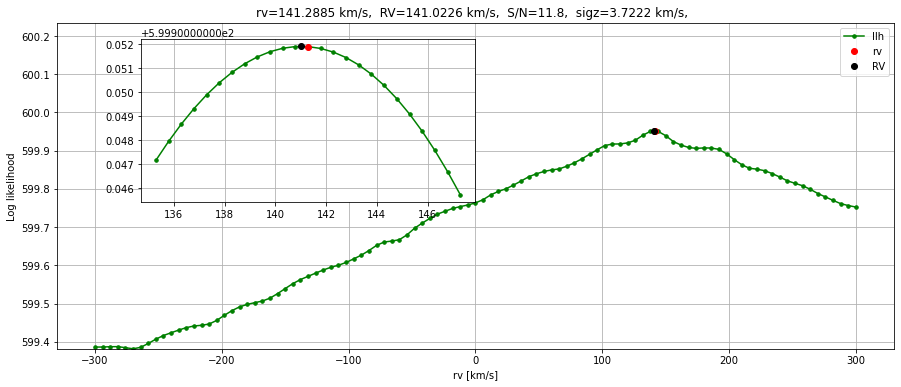

In [494]:
RV, F = f.evalRV(f.temps[0], obsflux_m, obsvar_m, rv, sky_mask0 = None, plot=1)

In [509]:
# sky_mask0 = f.getSkyMask(1)
sky_mask0=None

In [510]:
RV_masked, F_masked = f.evalRV(f.temps[0], obsflux_m, obsvar_m, rv, sky_mask0 = sky_mask0, plot=1)

Fitting with Template T8000G25Mm20Ap03Cp00
RV err=43.29%
sigma_z=0.92833


UnboundLocalError: local variable 'SN' referenced before assignment

In [497]:
RV

141.02255928698503

In [498]:
RV_masked

141.02255928698503

In [479]:
sky_mask0.shape

(4406,)

In [487]:
obsvar_m.shape

(4406,)

In [480]:
f.wave_mask.shape

(8893,)

In [483]:
 m = f.Doppler.getModel(f.temps[0].sst, rv, step=f.step)

In [485]:
m[]

(8893,)

In [478]:
obsflux_m.shape

(4406,)

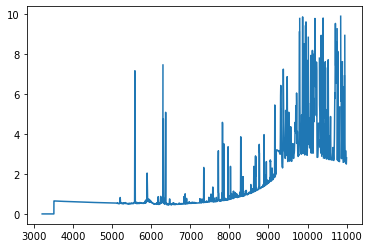

In [403]:
plt.plot(*f.sky.T)

In [406]:
for t in f.temps:
    print(t.skym)

[0.06310185 0.06939958 0.07740385 ... 0.29515761 0.29576331 0.29515761]
[0.06310185 0.06939958 0.07740385 ... 0.29515761 0.29576331 0.29515761]
[0.06310185 0.06939958 0.07740385 ... 0.29515761 0.29576331 0.29515761]
[0.06310185 0.06939958 0.07740385 ... 0.29515761 0.29576331 0.29515761]
[0.06310185 0.06939958 0.07740385 ... 0.29515761 0.29576331 0.29515761]
[0.06310185 0.06939958 0.07740385 ... 0.29515761 0.29576331 0.29515761]
[0.06310185 0.06939958 0.07740385 ... 0.29515761 0.29576331 0.29515761]
[0.06310185 0.06939958 0.07740385 ... 0.29515761 0.29576331 0.29515761]
[0.06310185 0.06939958 0.07740385 ... 0.29515761 0.29576331 0.29515761]


In [404]:
skym

AttributeError: 'Fisher' object has no attribute 'skym'

In [367]:
# obsflux_m, obsvar_m, SN = f.getObs_temp(f.flux, t0, rv, NL, pmt0=f.pmt, plot=1)

In [ ]:
#--------------------------------------
# process one spectrum through several 
# SNRs and build a histogram of the 
# normalized velocity estimates
#--------------------------------------
N   = 250
NT  = 4
NV  = 5
#----------------------------
t0 = time.time()

for NL in nlarr:
    t1 = time.time()
    S  = getSigmaSim(NL,NV,N,NT,ss,T)
    Q  = mergeSims(S)
    showSigmaHisto(Q)
    t2 = time.time()
    print('    ..time: ',t2-t1,' sec')

getSigmaTemplate(rv,nlarr,ss,T)
t3 = time.time()  
print('Total time: ',t3-t0,' sec')